In [1]:
import sys
sys.path.append('..')

In [2]:
import string
from pathlib import Path
from random import seed, randint, choices, choice

import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageFont, ImageOps
from tqdm import tqdm

from allometry.const import DATA_DIR, FONTS, CHAR_IMAGE_SIZE
from allometry.training_data import TrainingData

In [3]:
trainer = TrainingData(1)

1979_dot_matrix


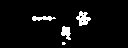

B612Mono-Bold


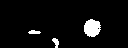

B612Mono-Regular


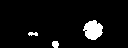

CourierPrime-Bold


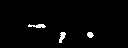

CourierPrime-BoldItalic


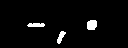

CourierPrime-Italic


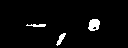

CourierPrime-Regular


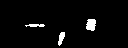

CutiveMono-Regular


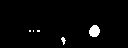

DOTMATRI


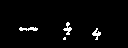

FiraMono-Bold


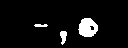

FiraMono-Medium


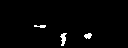

FiraMono-Regular


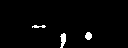

IBMPlexMono-Bold


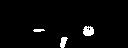

IBMPlexMono-Medium


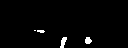

IBMPlexMono-SemiBold


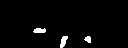

OverpassMono-Bold


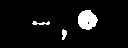

RobotoMono-Italic-VariableFont_wght


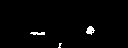

RobotoMono-VariableFont_wght


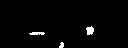

SourceCodePro-Black


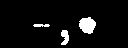

SourceCodePro-Bold


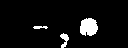

SourceCodePro-Medium


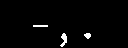

SourceCodePro-Regular


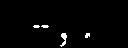

SourceCodePro-SemiBold


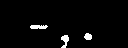

SpaceMono-Bold


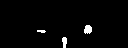

SyneMono-Regular


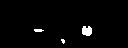

VT323-Regular


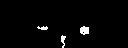

DottyRegular-vZOy


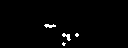

EHSMB


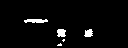

ELEKTRA_


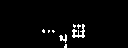

fake-receipt


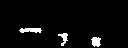

hydrogen


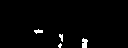

Merchant Copy Doublesize


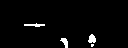

Merchant Copy Wide


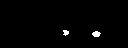

Merchant Copy


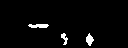

OcrB2


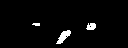

Ordre de Départ


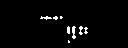

scoreboard


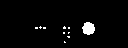

In [7]:
char = '-,.'
for font_path in FONTS:
    print(font_path.stem)

    image = trainer.char_image(char, font_path)

    display(image)